In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("height-weight.csv")

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

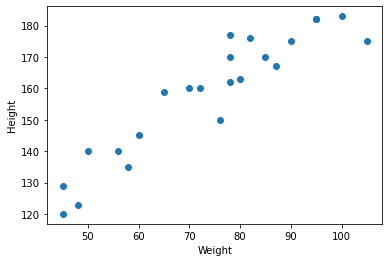

In [4]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


In [6]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [7]:
df.duplicated().sum()

1

In [8]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [9]:
X=df[['Weight']]
y=df['Height']


In [10]:
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [11]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [12]:
X.shape,y.shape

((23, 1), (23,))

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [15]:
X_train

,Weight
5,78
2,48
11,95
20,45
3,60
4,70
18,76
16,50
21,56
22,72


In [16]:
X_train.shape,X_test.shape


((15, 1), (8, 1))

In [17]:
## Standard scaler


In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [19]:
X_scaled=scaler.fit_transform(X_train)

In [20]:
X_train_scaled=X_scaled

In [21]:
X_train_scaled

array([[ 0.41007671],
       [-1.51215787],
       [ 1.49934297],
       [-1.70438132],
       [-0.74326404],
       [-0.10251918],
       [ 0.28192774],
       [-1.3840089 ],
       [-0.99956198],
       [ 0.02562979],
       [ 1.17897054],
       [ 0.66637465],
       [ 0.85859811],
       [ 0.98674708],
       [ 0.53822568]])

In [22]:
X_test=scaler.transform(X_test)

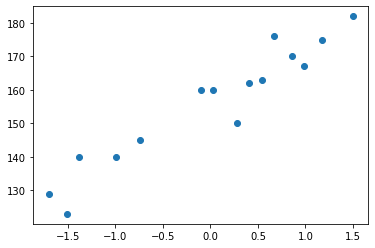

In [23]:
plt.scatter(X_train_scaled,y_train)


In [24]:
from sklearn.linear_model import LinearRegression


In [25]:
regressor=LinearRegression()

In [26]:
regressor.fit(X_train_scaled,y_train)

LinearRegression()

In [27]:
regressor.intercept_

156.13333333333333

In [28]:
regressor.coef_

array([16.26979346])

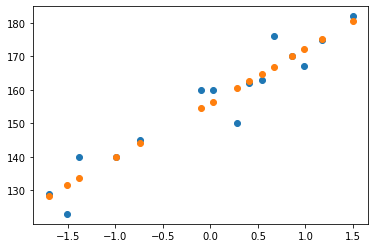

In [30]:
plt.scatter(X_train_scaled,y_train)
plt.scatter(X_train_scaled,regressor.predict(X_train_scaled))

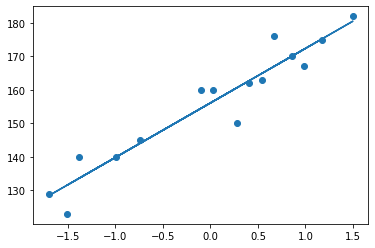

In [31]:
plt.scatter(X_train_scaled,y_train)
plt.plot(X_train_scaled,regressor.predict(X_train_scaled))

In [34]:
## prediction for test data
y_pred_test=regressor.predict(X_test)

In [35]:
y_pred_test

array([162.8051967 , 162.8051967 , 128.40340121, 180.52733377,
       149.25297424, 190.95212028, 141.95562368, 185.73972703])

In [36]:
y_test

15    177
9     170
0     120
8     182
17    159
12    175
1     135
13    183
Name: Height, dtype: int64

In [37]:
## metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred_test)
print(mse)

91.42562383241722


In [38]:
# accuracy r squared,adjusted r square
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)

In [39]:
score

0.8074173081896224

In [40]:
scaler

StandardScaler()

In [41]:
regressor

LinearRegression()